In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
store_df = pd.read_csv('store.csv')
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [3]:
train_df = pd.read_csv('train.csv')
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
df = pd.merge(store_df, train_df, on = 'Store')
df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1


In [5]:
df.shape 

(1017209, 18)

In [6]:
df.isnull().sum()

Store                             0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
dtype: int64

In [7]:
df.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
dtype: object

In [8]:
columns = list(df.columns)
for i in columns:
    print('Unique values in column :', df[i].unique())

Unique values in column : [   1    2    3 ... 1113 1114 1115]
Unique values in column : ['c' 'a' 'd' 'b']
Unique values in column : ['a' 'c' 'b']
Unique values in column : [1.270e+03 5.700e+02 1.413e+04 6.200e+02 2.991e+04 3.100e+02 2.400e+04
 7.520e+03 2.030e+03 3.160e+03 9.600e+02 1.070e+03 1.300e+03 4.110e+03
 3.270e+03 5.000e+01 1.384e+04 3.240e+03 2.340e+03 5.500e+02 1.040e+03
 4.060e+03 4.590e+03 4.300e+02 2.300e+03 6.000e+01 1.200e+03 2.170e+03
 4.000e+01 9.800e+03 2.910e+03 1.320e+03 2.240e+03 7.660e+03 5.400e+02
 4.230e+03 1.090e+03 2.600e+02 1.800e+02 1.180e+03 2.900e+02 4.880e+03
 9.710e+03 2.700e+02 1.060e+03 1.801e+04 6.260e+03 1.057e+04 4.500e+02
 3.036e+04 7.170e+03 7.200e+02 6.620e+03 4.200e+02 7.340e+03 2.840e+03
 5.540e+03 3.500e+02 2.050e+03 3.700e+03 2.256e+04 4.100e+02 2.500e+02
 1.130e+03 4.840e+03 1.750e+04 2.200e+03 1.650e+03 3.300e+02 2.244e+04
 1.996e+04 3.510e+03 3.320e+03 7.910e+03 2.370e+03 2.239e+04 2.710e+03
 1.181e+04 1.870e+03 4.800e+02 5.600e+02 1.069e

In [9]:
df['year'] = df['Date'].apply(lambda x: int(str(x)[0:4]))
df['month'] = df['Date'].apply(lambda x: int(str(x)[5:7]))

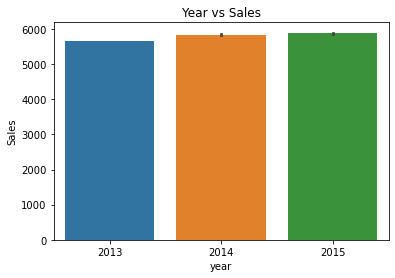

In [10]:
sns.barplot(x = 'year', y = 'Sales', data = df).set(title = 'Year vs Sales')
plt.show()

[Text(0.5, 1.0, 'Sales vs Day of Week')]

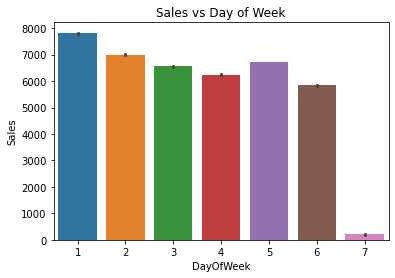

In [11]:
sns.barplot(x = 'DayOfWeek', y = 'Sales', data = df).set(title = 'Sales vs Day of Week')

[Text(0.5, 1.0, 'Sales on Promo')]

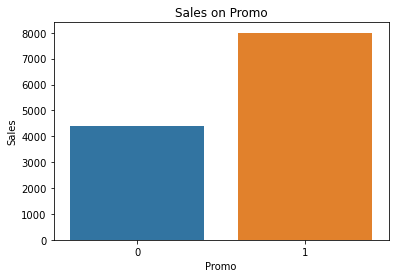

In [12]:
sns.barplot(x = 'Promo', y = 'Sales', data = df).set(title = 'Sales on Promo')

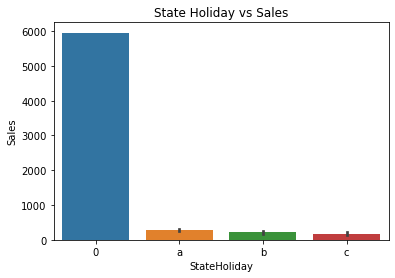

In [13]:
df['StateHoliday'].loc[df['StateHoliday'] == 0] = '0'
sns.barplot(x = 'StateHoliday', y = 'Sales', data = df).set(title = 'State Holiday vs Sales')
plt.show()

[Text(0.5, 1.0, 'School Holiday vs Sales')]

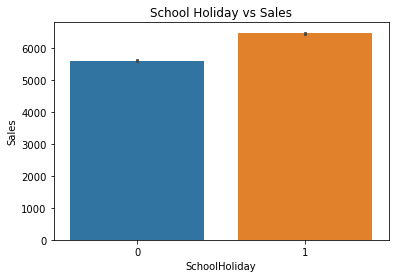

In [14]:
sns.barplot(x = 'SchoolHoliday', y = 'Sales', data = df).set(title = 'School Holiday vs Sales')

[Text(0.5, 1.0, 'StoreType vs Sales')]

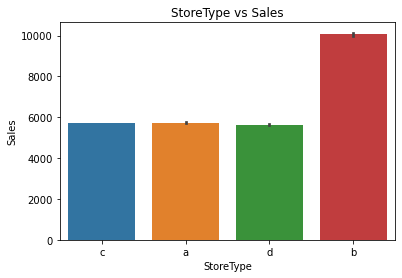

In [15]:
sns.barplot(x = 'StoreType', y = 'Sales', data = df).set(title = 'StoreType vs Sales')

[Text(0.5, 1.0, 'Assortment vs Sales')]

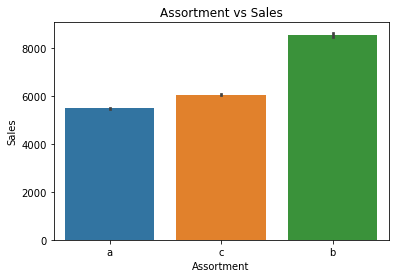

In [16]:
sns.barplot(x = 'Assortment', y = 'Sales', data = df).set(title = 'Assortment vs Sales')

In [17]:
df.update(df['Promo2SinceWeek'].fillna(value = 0, inplace = True))
df.update(df['Promo2SinceYear'].fillna(value = 0, inplace = True))
df.update(df['PromoInterval'].fillna(value = 0, inplace = True))

In [18]:
mean_competition_distance = df['CompetitionDistance'].mean()
df.update(df['CompetitionDistance'].fillna(value = mean_competition_distance, inplace = True))

In [19]:
mode_competition_open_since_month = df['CompetitionOpenSinceMonth'].mode()[0]
mode_competition_open_since_year = df['CompetitionOpenSinceYear'].mode()[0]
df.update(df['CompetitionOpenSinceMonth'].fillna(value = mode_competition_open_since_month, inplace = True))
df.update(df['CompetitionOpenSinceYear'].fillna(value = mode_competition_open_since_year, inplace = True))

df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
year                         0
month                        0
dtype: int64

<AxesSubplot:xlabel='CompetitionDistance', ylabel='Sales'>

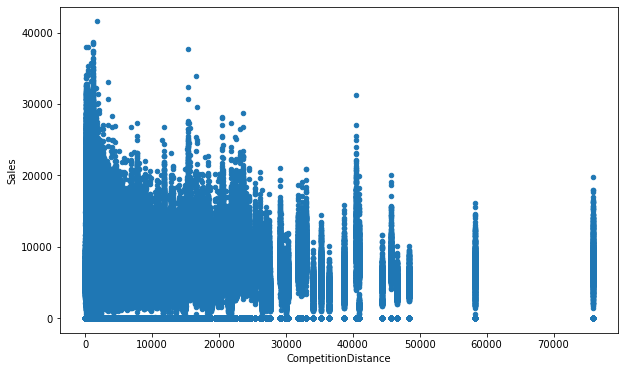

In [20]:
df.plot(x = 'CompetitionDistance', y = 'Sales', kind = 'scatter', figsize = (10,6))

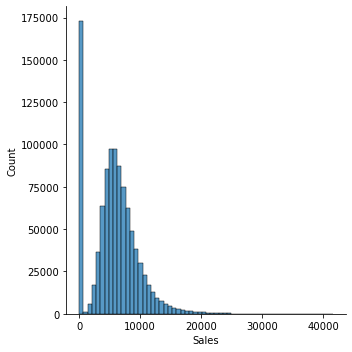

In [21]:
sns.displot(df,x='Sales',bins=60)

Total No. of outliers in dataset:  9731


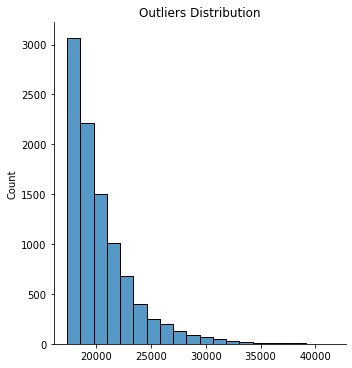

In [22]:
mean_sales = np.mean(df['Sales'])
std_sales = np.std(df['Sales'])

threshold = 3

outliers = []
for i in df['Sales']:
    z_score = (i - mean_sales) / std_sales
    if z_score > threshold:
        outliers.append(i)
        
print('Total No. of outliers in dataset: ', len(outliers))

sns.displot(x = outliers, bins = 20).set(title = 'Outliers Distribution')

In [23]:
zero_sales = df.loc[df['Sales'] == 0]

sales_greater_than_25k = df.loc[df['Sales'] > 25000]

print('Length of the dataset:', len(df))
print('Percentage of Zeros in dataset: %.3f%%' %((len(zero_sales) / len(df) * 100)))
print('Percentage of sales greater than 25k in dataset: %3f%%' %((len(sales_greater_than_25k) / len(df)) * 100))

Length of the dataset: 1017209
Percentage of Zeros in dataset: 16.995%
Percentage of sales greater than 25k in dataset: 0.074518%


In [24]:
df.drop(df.loc[df['Sales'] > 25000].index, inplace = True)

In [25]:
df.shape

(1016451, 20)

In [26]:
no_sales = df.loc[(df['Sales']==0) & (df['Open'] == 1) & (df['StateHoliday'] == 0) 
                               & (df['SchoolHoliday'] == 0)]
print(no_sales.shape)
no_sales.head()


(0, 20)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month


In [27]:
df.drop(df.loc[(df['Sales']==0) & (df['Open'] == 1)
                                     & (df['StateHoliday'] == 0) & 
                                     (df['SchoolHoliday'] == 0)].index,inplace=True)
print(df.shape)

(1016451, 20)


In [28]:
df.drop(['Date'], axis = 1, inplace = True)
df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,5,5263,555,1,1,0,1,2015,7
1,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,4,5020,546,1,1,0,1,2015,7
2,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,3,4782,523,1,1,0,1,2015,7
3,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2,5011,560,1,1,0,1,2015,7
4,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,1,6102,612,1,1,0,1,2015,7


In [29]:
df['StateHoliday'].loc[df['StateHoliday'] == 0] = '0'
df['PromoInterval'].loc[df['PromoInterval'] == 0] = '0'

In [30]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['StoreType'] = label_encoder.fit_transform(df['StoreType'])
df['Assortment'] = label_encoder.fit_transform(df['Assortment'])
df['StateHoliday'] = label_encoder.fit_transform(df['StateHoliday'])
df['PromoInterval'] = label_encoder.fit_transform(df['PromoInterval'])

df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month
0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,5,5263,555,1,1,0,1,2015,7
1,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,4,5020,546,1,1,0,1,2015,7
2,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,3,4782,523,1,1,0,1,2015,7
3,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,2,5011,560,1,1,0,1,2015,7
4,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,1,6102,612,1,1,0,1,2015,7


<AxesSubplot:>

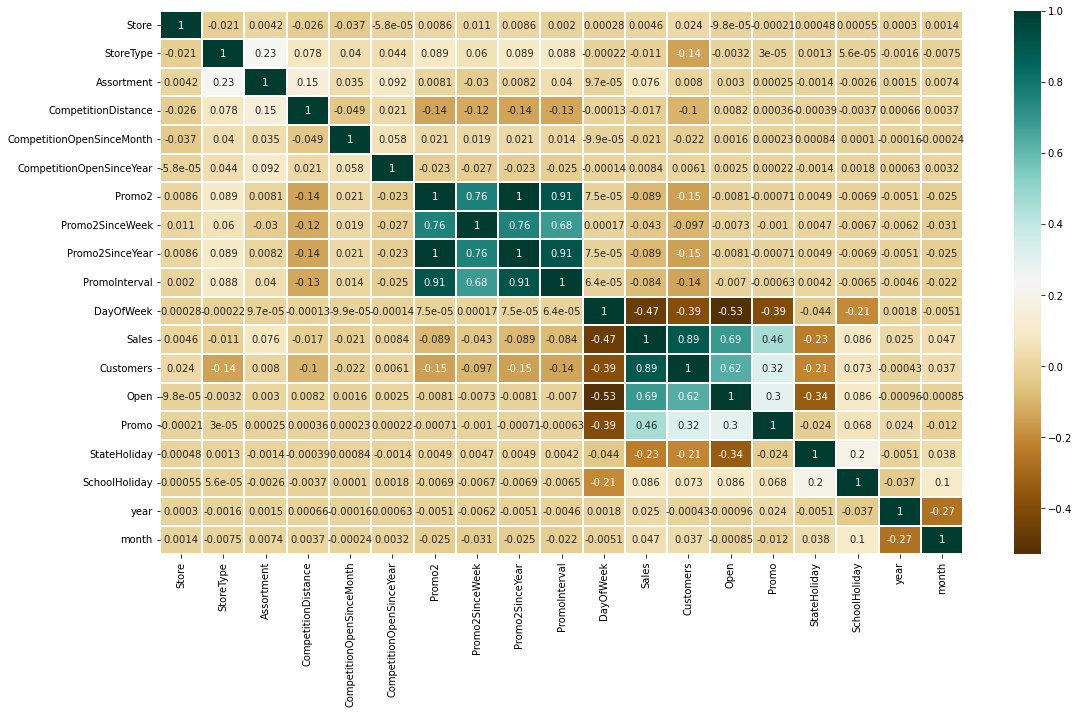

In [31]:
corr = df.corr()
plt.figure(figsize = (18,10))
sns.heatmap(corr, annot = True, linewidths = 0.2, cmap = 'BrBG')

In [32]:
df_open = df[df['Open'] == 1]
df_closed = df[df['Open'] == 0]

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math

X_train, X_test, y_train, y_test_open = train_test_split(df_open.drop(['Sales', 'Customers', 'Open'], axis = 1),
                                                   df_open['Sales'], test_size = 0.2, random_state = 23)

In [34]:
X_train.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'DayOfWeek',
       'Promo', 'StateHoliday', 'SchoolHoliday', 'year', 'month'],
      dtype='object')

In [35]:
y_train.head()

208923     5945
917287    10503
487634     5569
467847    20086
559331     6185
Name: Sales, dtype: int64

In [36]:
y_test_closed = np.zeros(df_closed.shape[0])
y_test = np.append(y_test_open, y_test_closed)

In [37]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [38]:
prediction_open = model.predict(X_test)
prediction_closed = np.zeros(df_closed.shape[0])

y_predict = np.append(prediction_open, prediction_closed)

In [39]:
print('r2_score:', r2_score(y_test, y_predict))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test, y_predict))
print('Root mean squared error: ', math.sqrt(mean_squared_error(y_test, y_predict)))

r2_score: 0.7778682020274736
Mean absolute error: 994.10
Root mean squared error:  1919.965787569351


Text(0, 0.5, 'Predicted values')

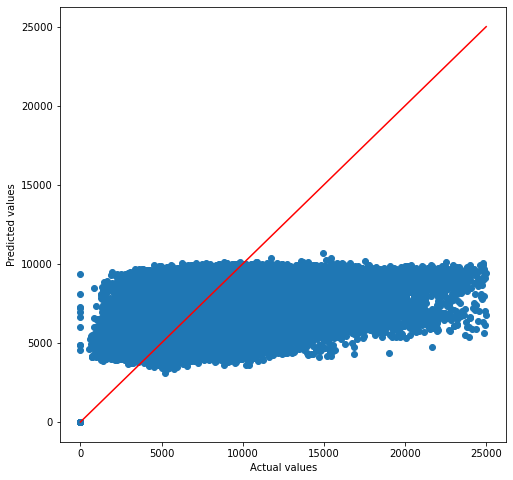

In [40]:
plt.figure( figsize = (8,8))
plt.scatter(y_test, y_predict)

p1 = max(max(y_predict), max(y_test))
p2 = min(min(y_predict), min(y_test))
plt.plot([p1,p2], [p1, p2], c = 'r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

r2_score: -4.104604603623469e+21
Mean absolute error: 155871997500154.00
Root mean squared error:  260989952273975.25


Text(0, 0.5, 'Predicted values')

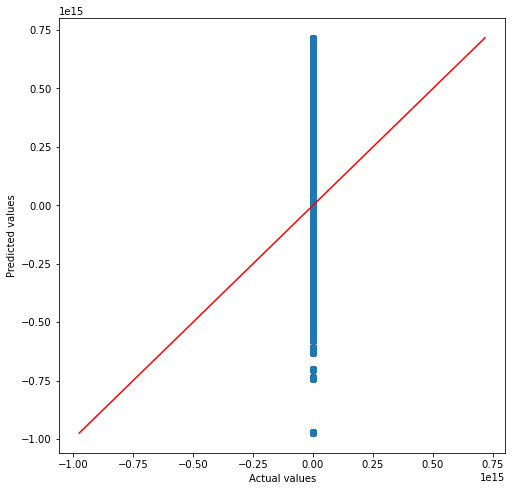

In [41]:
from sklearn.linear_model import SGDRegressor

model = SGDRegressor()
model.fit(X_train, y_train)

prediction_open = model.predict(X_test)
prediction_closed = np.zeros(df_closed.shape[0])

y_predict = np.append(prediction_open, prediction_closed)

print('r2_score:',r2_score(y_test,y_predict))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test,y_predict))
print('Root mean squared error: ', math.sqrt(mean_squared_error(y_test,y_predict)))

plt.figure(figsize=(8,8))
plt.scatter(y_test,y_predict)

p1 = max(max(y_predict),max(y_test))
p2 = min(min(y_predict),min(y_test))
plt.plot([p1,p2],[p1,p2],c='r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

r2_score: 0.9514941503857073
Mean absolute error: 419.98
Root mean squared error:  897.1915652326409


Text(0, 0.5, 'Predicted values')

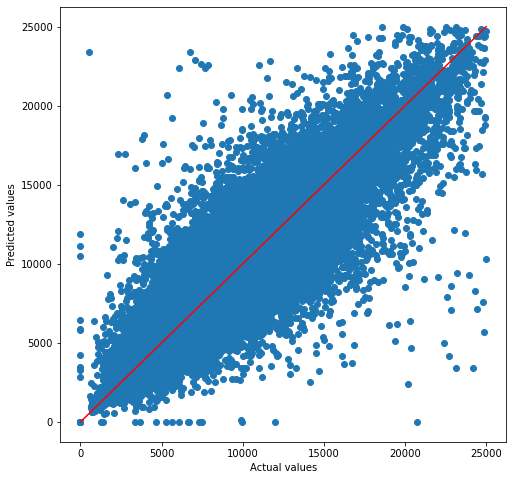

In [42]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train,y_train)

prediction_open = model.predict(X_test)
prediction_closed = np.zeros(df_closed.shape[0])

y_predict = np.append(prediction_open,prediction_closed)

print('r2_score:',r2_score(y_test,y_predict))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test,y_predict))
print('Root mean squared error: ', math.sqrt(mean_squared_error(y_test,y_predict)))

plt.figure(figsize=(8,8))
plt.scatter(y_test,y_predict)

p1 = max(max(y_predict),max(y_test))
p2 = min(min(y_predict),min(y_test))
plt.plot([p1,p2],[p1,p2],c='r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')


In [ ]:
from sklearn.ensemble import RandomForestRegressor

random_forest_model = RandomForestRegressor(n_estimators=100)
random_forest_model.fit(X_train,y_train)

prediction_open = random_forest_model.predict(X_test)
prediction_closed = np.zeros(df_closed.shape[0])

y_predict = np.append(prediction_open,prediction_closed)


print('r2_score:',r2_score(y_test,y_predict))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test,y_predict))
print('Root mean squared error: ', math.sqrt(mean_squared_error(y_test,y_predict)))

plt.figure(figsize=(8,8))
plt.scatter(y_test,y_predict)

p1 = max(max(y_predict),max(y_test))
p2 = min(min(y_predict),min(y_test))
plt.plot([p1,p2],[p1,p2],c='r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

In [ ]:
feature_importance = random_forest_model.feature_importances_
feature_importance

In [ ]:
columns = list(X_train.columns)
columns

In [ ]:
feature_importance_df = pd.DataFrame({'Features':columns, 'Values':feature_importance})
feature_importance_df

In [ ]:
feature_importance_df.sort_values(by = ['Values'], inplace = True, ascending = False)
feature_importance_df

In [ ]:
plt.figure(figsize = (15,6))

sns.barplot(x = feature_importance_df['Features'], y = feature_importance_df['Values'],
           data = feature_importance_df).set(title = 'Feature Importance')

plt.xticks(rotation = 90)
plt.show()

### Conclusão:

1. A distância de concorrência mais próxima torna as lojas mais competitivas e, portanto, o uso de códigos promocionais pode ajudá-las a aumentar suas vendas.

2. O tipo de loja afeta as vendas - De todos os modelos de loja a,b,c,d, as lojas do tipo 'b' têm as vendas mais altas.

3. O código promocional pode ajudar a aumentar a concorrência e levar a mais vendas.

4. As vendas em 1 (segunda-feira) e 5 (sexta-feira) são as mais altas.

5. O nível de sortimento 'b' tem as vendas mais altas.

6. Os clientes são definitivamente atraídos por códigos promocionais, portanto, as vendas são maiores quando há um código promocional em uma loja

7. Como a maioria das lojas fecha nos feriados, o recurso feriados estaduais não afeta as vendas